In [1]:
import matplotlib.pyplot as plt
import numpy as np
import warnings

# Aperture Experiments

A notebook to experiment with transforming various apertures into the NF beam pattern, based on M.T.E. Cherot paper

In [2]:
def Calc_FF_dist(a, b, freq):
    c = 3.0e8 # in m/s
    wavelength = c/freq # in m
    FF_dist = 2*(a**2+b**2)/wavelength # should be in m, using the formula from the paper

    return FF_dist

## Rectangular aperture

In [3]:
# constructing a plain rectangular aperture
aperture = np.ones((20,100))

In [4]:
# calculate FF distance
# a = 100 # in m
# b = 20 # in m
# for test exactly matching the paper:
a = 3.75
b = a/2
freq = 800e6 # in Hz
FF_dist = Calc_FF_dist(a, b, freq)
c = 3.0e8 # in m/s
wavelength = c/freq # in m
print(f'FF distance: {FF_dist}')
print(f'wavelength: {wavelength}')

FF distance: 93.75
wavelength: 0.375


In [5]:
# how big should smaller rectangular apertures be?
# we want it so that the dimensions are such that the distance we're looking at is in the FF
# flight_height = 500 # in m, same as for the CHIME flights
flight_height = FF_dist*0.1 # for matching conditions of paper
# flight_height = 50
print(f"flight height: {flight_height} m")

# how many pieces to divide the dimensions into
# a_pieces = 40
# b_pieces = 20
# for matching paper conditions:
a_pieces = 20
b_pieces = 10

# find a_i, b_i for the smaller apertures
a_i = a/a_pieces
b_i = b/b_pieces

# calculate FF distance for small aperture
aperture_FF_dist = Calc_FF_dist(a_i, b_i, freq)

print(f"{a_i} m x {b_i} m aperture: FF distance of {aperture_FF_dist} m")

flight height: 9.375 m
0.1875 m x 0.1875 m aperture: FF distance of 0.375 m


In [6]:
# putting together information about rectangular apertures
n_apertures = a_pieces * b_pieces

a_i_all = a_i * np.ones((b_pieces, a_pieces))
b_i_all = b_i * np.ones((b_pieces, a_pieces))

# calculating the centers of each aperture (alpha_i and beta_i)
alpha_i = np.linspace(-a/2+a_i/2, a/2-a_i/2, a_pieces)
beta_i = np.linspace(-b/2+b_i/2, b/2-b_i/2, b_pieces)

# making a grid so it's calculated for each aperture
[alpha_i, beta_i] = np.meshgrid(alpha_i, beta_i)

print(beta_i)
print(alpha_i)

[[-0.84375 -0.84375 -0.84375 -0.84375 -0.84375 -0.84375 -0.84375 -0.84375
  -0.84375 -0.84375 -0.84375 -0.84375 -0.84375 -0.84375 -0.84375 -0.84375
  -0.84375 -0.84375 -0.84375 -0.84375]
 [-0.65625 -0.65625 -0.65625 -0.65625 -0.65625 -0.65625 -0.65625 -0.65625
  -0.65625 -0.65625 -0.65625 -0.65625 -0.65625 -0.65625 -0.65625 -0.65625
  -0.65625 -0.65625 -0.65625 -0.65625]
 [-0.46875 -0.46875 -0.46875 -0.46875 -0.46875 -0.46875 -0.46875 -0.46875
  -0.46875 -0.46875 -0.46875 -0.46875 -0.46875 -0.46875 -0.46875 -0.46875
  -0.46875 -0.46875 -0.46875 -0.46875]
 [-0.28125 -0.28125 -0.28125 -0.28125 -0.28125 -0.28125 -0.28125 -0.28125
  -0.28125 -0.28125 -0.28125 -0.28125 -0.28125 -0.28125 -0.28125 -0.28125
  -0.28125 -0.28125 -0.28125 -0.28125]
 [-0.09375 -0.09375 -0.09375 -0.09375 -0.09375 -0.09375 -0.09375 -0.09375
  -0.09375 -0.09375 -0.09375 -0.09375 -0.09375 -0.09375 -0.09375 -0.09375
  -0.09375 -0.09375 -0.09375 -0.09375]
 [ 0.09375  0.09375  0.09375  0.09375  0.09375  0.09375  0.09375 

In [7]:
# make a grid on which to evaluate the NF electric field at height of 307 m
# NF_x_vector = np.linspace(-70, 70, 100)
# NF_y_vector = np.linspace(-30, 30, 100)
# for matching the paper:
NF_x_vector = np.linspace(-20,20,40)
NF_y_vector = np.linspace(-20,20,40)
[NF_x_grid, NF_y_grid] = np.meshgrid(NF_x_vector, NF_y_vector)
NF_z = flight_height * np.ones(NF_x_grid.shape)

In [8]:
print(NF_x_grid)
print(NF_y_grid)
print(alpha_i)
print(beta_i)

[[-20.         -18.97435897 -17.94871795 ...  17.94871795  18.97435897
   20.        ]
 [-20.         -18.97435897 -17.94871795 ...  17.94871795  18.97435897
   20.        ]
 [-20.         -18.97435897 -17.94871795 ...  17.94871795  18.97435897
   20.        ]
 ...
 [-20.         -18.97435897 -17.94871795 ...  17.94871795  18.97435897
   20.        ]
 [-20.         -18.97435897 -17.94871795 ...  17.94871795  18.97435897
   20.        ]
 [-20.         -18.97435897 -17.94871795 ...  17.94871795  18.97435897
   20.        ]]
[[-20.         -20.         -20.         ... -20.         -20.
  -20.        ]
 [-18.97435897 -18.97435897 -18.97435897 ... -18.97435897 -18.97435897
  -18.97435897]
 [-17.94871795 -17.94871795 -17.94871795 ... -17.94871795 -17.94871795
  -17.94871795]
 ...
 [ 17.94871795  17.94871795  17.94871795 ...  17.94871795  17.94871795
   17.94871795]
 [ 18.97435897  18.97435897  18.97435897 ...  18.97435897  18.97435897
   18.97435897]
 [ 20.          20.          20.        

In [9]:
# a function to evaluate electric field for a given sub-aperture at a given position--this is wrong because it doesn't have the illumination function
def small_aperture_E_field(a_i, b_i, alpha_i, beta_i, x, y, z, freq):
    
    c = 3.0e8 # in m/s
    wavelength = c/freq # in m
    k = 2*np.pi/wavelength # in m^(-1)
        
    under_sqrt = (x - alpha_i)**2 + (y - beta_i)**2 + z**2
    r_i = np.sqrt(under_sqrt)
    
    if r_i == 0:
        print("r_i=0")
    if (y-beta_i==0):
        print(f"for alpha_i: {alpha_i} and beta_i: {beta_i}, y-beta_i=0")
    
    FF_dist = Calc_FF_dist(a_i, b_i, freq)
        
    if r_i < FF_dist:
        print('r_i value is not valid')
        return
    
    coeff = 1j*(z + r_i)/(2*np.pi*k)
    sin1 = np.sin(k*a_i*(x-alpha_i)/(2*r_i))/(x-alpha_i)
    sin2 = np.sin(k*b_i*(y-beta_i)/(2*r_i))/(y-beta_i)
    exponent = np.exp(-1j*k*r_i)
    
    aperture_E_field = coeff*sin1*sin2*exponent
    
    return aperture_E_field

In [10]:
# testing small_aperture_E_field function
E_field = small_aperture_E_field(a_i_all[0,0], b_i_all[0,0], alpha_i[0,0], beta_i[0,0], NF_x_grid[0,0], NF_y_grid[0,0], NF_z[0,0], freq)
print(E_field)

(-0.0007271958342052047+0.00022978768691726348j)


In [84]:
# function to add up the E-field across all the small apertures, for one position in (x, y, z)--don't use this

def total_aperture_NF_E_field(a_i, b_i, alpha_i, beta_i, x, y, z, freq):
    
    # all the inputs must be grids of the values for all the apertures
    
    E_field_components = np.empty(a_i.shape, dtype = complex)
    
    # loop through and calculate for all apertures
    for i_adim in range(a_i.shape[1]):
        for i_bdim in range(b_i.shape[0]):
            
#             with warnings.catch_warnings(record=True) as w:
#                 warnings.simplefilter("always")  # Ensure all warnings are captured  
#             print(f"Box ({i_adim}, {i_bdim})")
            E_field_components[i_bdim, i_adim] = small_aperture_E_field(a_i[i_bdim, i_adim], b_i[i_bdim, i_adim], alpha_i[i_bdim, i_adim], beta_i[i_bdim, i_adim], x, y, z, freq)
            total_E_field = np.sum(E_field_components)
            
#             if w:
#                 for warning in w:
#                     print(f"Warning for aperture x={i_adim} y={i_bdim}: {warning.message}")
    
    return total_E_field

In [12]:
def scanrt_full_aperture(a_i_all, b_i_all, alpha_i_all, beta_i_all, X, Y, Z, freq, ill):
    """
    SCANRT subroutine adjusted to scan the entire aperture without symmetry.
    
    Parameters:
    - ja: Number of divisions in the aperture scan
    - byh: Half the height of the rectangular aperture
    - bxh: Half the width of the rectangular aperture
    - X, Y, Z: Coordinates of the observation point
    - C1, C2, C3: Constants used in field calculation
    - NA, NB: Powers for the illumination function
    - WN: Wavenumber (2*pi/lambda)
    - A, B: Full width and height of the aperture
    
    Returns:
    - ERSUM: Real part of the electric field
    - ECSUM: Imaginary part of the electric field
    """
    
    # Initialize sums for real and imaginary components
    ERSUM = 0.0
    ECSUM = 0.0
    
    c = 3.0e8 # in m/s
    wavelength = c/freq # in m
    k = 2*np.pi/wavelength # in m^(-1)

    # Full aperture scan (negative to positive X and Y)--scan through all subapertures
    for i_adim in range(a_i_all.shape[1]):
        for i_bdim in range(b_i_all.shape[0]):
            
            a_i = a_i_all[i_bdim, i_adim]
            b_i = b_i_all[i_bdim, i_adim]
            alpha_i = alpha_i_all[i_bdim, i_adim]
            beta_i = beta_i_all[i_bdim, i_adim]
                
            Y1 = Y - beta_i
            X1 = X - alpha_i
            
            # Distance calculations for each point
            r_iS = X1**2 + Y1**2 + Z**2
            r_i = np.sqrt(r_iS)
            
            
            # calculate C1, C2, C3
            C1 = 0.5 / (np.pi*k)
            C2 = k * a_i / 2
            C3 = k * b_i / 2
            
            # Z-component of the field
            EZR1 = (Z + r_i) * C1
            
            # Phase angles for X and Y
            ARX1 = C2 * X1 / r_i if r_i != 0 else 0
            ARY1 = C3 * Y1 / r_i if r_i != 0 else 0
            
            # X and Y field components
            EX1 = np.sin(ARX1) / X1 if X1 != 0 else 0
            EY1 = np.sin(ARY1) / Y1 if Y1 != 0 else 0
            
            # Total electric field amplitude for the point
            EA1 = EZR1 * EX1 * EY1
            
            # Real and imaginary components (with phase shifts)
            EA1R = EA1 * np.sin(k * r_i)
            EA1C = EA1 * np.cos(k * r_i)
            
            # Adjust for directional dependence
            EA1RN = EA1R * np.sqrt(1.0 - (Y1 / r_i)**2) if r_i != 0 else 0
            EA1CN = EA1C * np.sqrt(1.0 - (Y1 / r_i)**2) if r_i != 0 else 0
            
            # Real and imaginary field contributions for the current point
            ER = 2.0 * EA1RN * ill
            EC = 2.0 * EA1CN * ill
            
            # Sum the contributions to the total field
            ERSUM += ER
            ECSUM += EC

    return ERSUM, ECSUM

# Example usage:
# ja = 10
# byh = 0.5
# bxh = 0.5
# X, Y, Z = 1.0, 1.0, 1.0
# C1, C2, C3 = 1.0, 1.0, 1.0
# NA, NB = 2, 2
# WN = 2 * np.pi / 1.0  # Assuming wavelength is 1 unit
# A, B = 2.0, 2.0
# ERSUM, ECSUM = scanrt_full_aperture(ja, byh, bxh, X, Y, Z, C1, C2, C3, NA, NB, WN, A, B)
# print(f"Real part of the field: {ERSUM}, Imaginary part: {ECSUM}")

In [13]:
E_field = total_aperture_NF_E_field(a_i_all, b_i_all, alpha_i, beta_i, NF_x_grid[0, 0], NF_y_grid[0, 0], NF_z[0, 0], freq)

In [14]:
# calculate E-field for all the points on the NF grid

complex_E_field = np.empty(NF_x_grid.shape, dtype = complex)

for ix_value in range(NF_x_grid.shape[1]):
    for iy_value in range(NF_y_grid.shape[0]):
        
#         with warnings.catch_warnings(record=True) as w:
#             warnings.simplefilter("always")  # Ensure all warnings are captured
        complex_E_field[iy_value, ix_value] = total_aperture_NF_E_field(a_i_all, b_i_all, alpha_i, beta_i, NF_x_grid[iy_value, ix_value], NF_y_grid[iy_value, ix_value], NF_z[iy_value, ix_value], freq)        
        
#         if w:
#             # Iterate over captured warnings
#             for warning in w:
#                 print(f"Iteration x: {ix_value}, y: {iy_value} caused a warning: {warning.message}")
        

In [15]:
# calculate E-field for all the points on the NF grid using SCANRT copy (from Fortran)
real_E_field = np.empty(NF_x_grid.shape, dtype = float)
imag_E_field = np.empty(NF_x_grid.shape, dtype = float)

for ix_value in range(NF_x_grid.shape[1]):
    for iy_value in range(NF_y_grid.shape[0]):
        
#         with warnings.catch_warnings(record=True) as w:
#             warnings.simplefilter("always")  # Ensure all warnings are captured

        real_E_field[iy_value, ix_value], imag_E_field[iy_value, ix_value] = scanrt_full_aperture(a_i_all, b_i_all, alpha_i, beta_i, 
            NF_x_grid[iy_value, ix_value], NF_y_grid[iy_value, ix_value], NF_z[iy_value, ix_value], freq, 1)

#         if w:
#             # Iterate over captured warnings
#             for warning in w:
#                 print(f"Iteration x: {ix_value}, y: {iy_value} caused a warning: {warning.message}")
        

In [16]:
E_total = np.sqrt(real_E_field**2 + imag_E_field**2)

In [17]:
# iy_value = 0
# ix_value = 21
# complex_E_field[iy_value, ix_value] = total_aperture_NF_E_field(a_i_all, b_i_all, alpha_i, beta_i, NF_x_grid[iy_value, ix_value], NF_y_grid[iy_value, ix_value], NF_z[iy_value, ix_value], freq)

<ipython-input-18-7b871d4b8c57>:2: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  pcm=ax.pcolormesh(NF_x_grid, NF_y_grid, np.abs(complex_E_field))


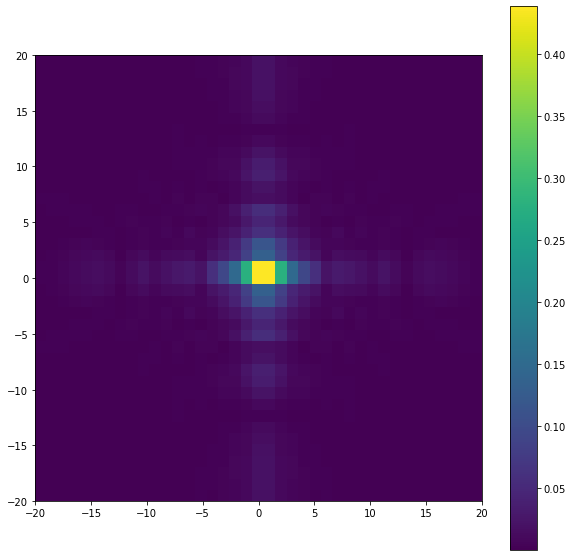

In [18]:
fig, ax = plt.subplots(1,1,figsize=(10,10))
pcm=ax.pcolormesh(NF_x_grid, NF_y_grid, np.abs(complex_E_field))
ax.set_aspect('equal')

plt.colorbar(mappable=pcm)

<ipython-input-19-b8e73ad37891>:3: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  pcm=ax.pcolormesh(NF_x_grid, NF_y_grid, E_total)


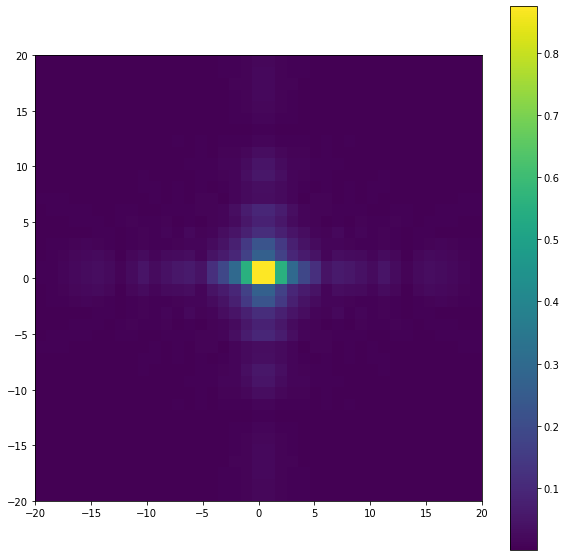

In [19]:
# plotting the result from the fortran-based function
fig, ax = plt.subplots(1,1,figsize=(10,10))
pcm=ax.pcolormesh(NF_x_grid, NF_y_grid, E_total)
ax.set_aspect('equal')

plt.colorbar(mappable=pcm)

## Producing the plot from the paper

In [20]:
# calculating the normalized range
c = 3.0e8 # in m/s
wavelength = c/freq # in m
RN = flight_height/(2*a**2/wavelength)

print(f"Normalized range: {RN}")

Normalized range: 0.125


In [21]:
# producing the relative power density
# this isn't in the paper, but my guess at how to do it
relative_power = (1/2)*(np.abs(complex_E_field))**2
relative_power_ft = (1/2)*(E_total)**2

<ipython-input-22-c790b4203adf>:3: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  pcm1=ax.pcolormesh(NF_x_grid, NF_y_grid, relative_power)


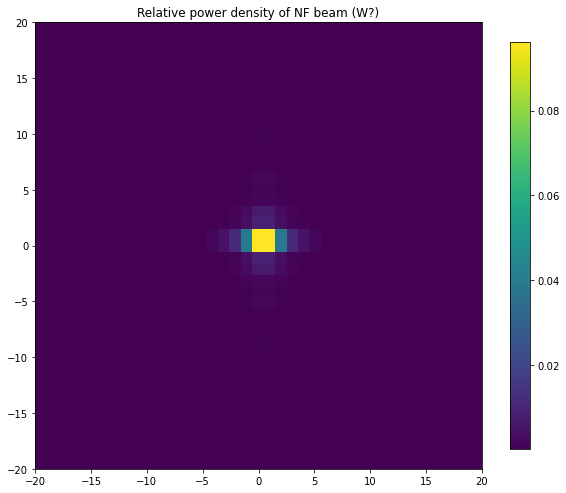

In [22]:
# plotting relative power for the whole beam
fig, ax = plt.subplots(1,1,figsize=(10,10))
pcm1=ax.pcolormesh(NF_x_grid, NF_y_grid, relative_power)
ax.set_aspect('equal')
ax.set_title('Relative power density of NF beam (W?)')
plt.colorbar(mappable=pcm1,ax=ax,shrink=0.75)

<ipython-input-23-834a7e7b7900>:3: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  pcm1=ax.pcolormesh(NF_x_grid, NF_y_grid, relative_power_ft)


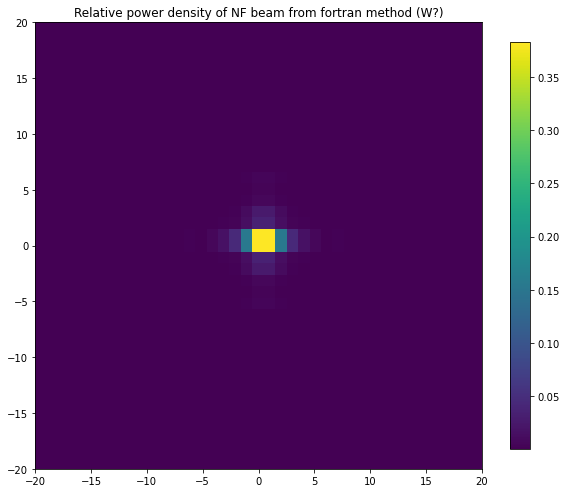

In [23]:
# plotting relative power for the whole beam--Fortran version
fig, ax = plt.subplots(1,1,figsize=(10,10))
pcm1=ax.pcolormesh(NF_x_grid, NF_y_grid, relative_power_ft)
ax.set_aspect('equal')
ax.set_title('Relative power density of NF beam from fortran method (W?)')
plt.colorbar(mappable=pcm1,ax=ax,shrink=0.75)

In [24]:
# taking a slice of the beam at x = 0
# slice_index = np.where((NF_x_vector < 2) & (NF_x_vector > -2))
slice_index = np.where((NF_x_vector<1) & (NF_x_vector > -1)) # method for paper
print(slice_index)

(array([19, 20]),)


In [25]:
print(NF_x_vector[19])
print(NF_x_vector[20])

-0.5128205128205146
0.512820512820511


In [26]:
# power_density_slice = relative_power[:,50]
# NF_x_slice = NF_x_grid[:,50]
# NF_y_slice = NF_y_grid[:,50]
# for paper replica version:
power_density_slice = relative_power[:,20]
NF_x_slice = NF_x_grid[:,20]
NF_y_slice = NF_y_grid[:,20]
print(power_density_slice)
print(NF_x_slice)
print(NF_y_slice)

[1.62300232e-04 1.79736556e-04 1.90308225e-04 1.87882434e-04
 1.65403374e-04 1.18489666e-04 5.40117478e-05 4.36911232e-06
 3.82809487e-05 2.32746773e-04 5.47391487e-04 6.54623175e-04
 2.30161006e-04 1.47587743e-04 1.54095504e-03 9.44299330e-04
 1.70107006e-03 6.76027907e-03 8.81141533e-03 9.62696280e-02
 9.62696280e-02 8.81141533e-03 6.76027907e-03 1.70107006e-03
 9.44299330e-04 1.54095504e-03 1.47587743e-04 2.30161006e-04
 6.54623175e-04 5.47391487e-04 2.32746773e-04 3.82809487e-05
 4.36911232e-06 5.40117478e-05 1.18489666e-04 1.65403374e-04
 1.87882434e-04 1.90308225e-04 1.79736556e-04 1.62300232e-04]
[0.51282051 0.51282051 0.51282051 0.51282051 0.51282051 0.51282051
 0.51282051 0.51282051 0.51282051 0.51282051 0.51282051 0.51282051
 0.51282051 0.51282051 0.51282051 0.51282051 0.51282051 0.51282051
 0.51282051 0.51282051 0.51282051 0.51282051 0.51282051 0.51282051
 0.51282051 0.51282051 0.51282051 0.51282051 0.51282051 0.51282051
 0.51282051 0.51282051 0.51282051 0.51282051 0.5128205

In [27]:
# power_density_slice_ft = relative_power_ft[:,50]
# NF_x_slice = NF_x_grid[:,50]
# NF_y_slice = NF_y_grid[:,50]
# for version matching paper:
power_density_slice_ft = relative_power_ft[:,20]
NF_x_slice = NF_x_grid[:,20]
NF_y_slice = NF_y_grid[:,20]
print(power_density_slice_ft)
print(NF_x_slice)
print(NF_y_slice)

[1.18861904e-04 1.43365521e-04 1.65847238e-04 1.79515043e-04
 1.74027712e-04 1.38279884e-04 7.16328266e-05 1.04692733e-05
 6.54416687e-05 4.11018410e-04 1.06720917e-03 1.42462396e-03
 5.79143981e-04 4.33290712e-04 4.57905582e-03 3.15950116e-03
 6.13279972e-03 2.54930643e-02 3.54148293e-02 3.83103028e-01
 3.83103028e-01 3.54148293e-02 2.54930643e-02 6.13279972e-03
 3.15950116e-03 4.57905582e-03 4.33290712e-04 5.79143981e-04
 1.42462396e-03 1.06720917e-03 4.11018410e-04 6.54416687e-05
 1.04692733e-05 7.16328266e-05 1.38279884e-04 1.74027712e-04
 1.79515043e-04 1.65847238e-04 1.43365521e-04 1.18861904e-04]
[0.51282051 0.51282051 0.51282051 0.51282051 0.51282051 0.51282051
 0.51282051 0.51282051 0.51282051 0.51282051 0.51282051 0.51282051
 0.51282051 0.51282051 0.51282051 0.51282051 0.51282051 0.51282051
 0.51282051 0.51282051 0.51282051 0.51282051 0.51282051 0.51282051
 0.51282051 0.51282051 0.51282051 0.51282051 0.51282051 0.51282051
 0.51282051 0.51282051 0.51282051 0.51282051 0.5128205

In [28]:
# calculating normalized power density in dB
# for the power density at 0 degrees off-axis, we'll take the average of the values about 0
# dB_normalization_factor = np.mean(power_density_slice[49:50])
# dB_power_density_slice = 10*np.log10(power_density_slice/dB_normalization_factor)
# for matching the paper:
dB_normalization_factor = np.mean(power_density_slice[19:20])
dB_power_density_slice = 10*np.log10(power_density_slice/dB_normalization_factor)

In [29]:
# calculating normalized power density in dB--for Fortran produced data
# for the power density at 0 degrees off-axis, we'll take the average of the values about 0
# dB_normalization_factor_ft = np.mean(power_density_slice_ft[49:50])
# dB_power_density_slice_ft = 10*np.log10(power_density_slice_ft/dB_normalization_factor_ft)
# for matching the paper:
dB_normalization_factor_ft = np.mean(power_density_slice_ft[19:20])
dB_power_density_slice_ft = 10*np.log10(power_density_slice_ft/dB_normalization_factor_ft)

In [30]:
NF_y_slice.shape
dB_power_density_slice_ft.shape
# power_density_slice_ft.shape

(40,)

Text(0.5, 1.0, 'for RN ~ 0.01, A = 100, B = 20')

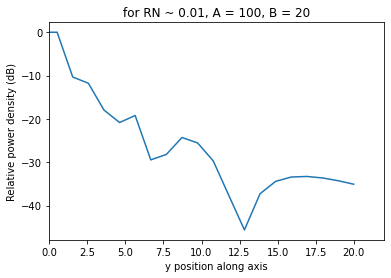

In [31]:
# plotting the power density
plt.plot(NF_y_slice,dB_power_density_slice_ft)
plt.xlim(left=0)
plt.ylabel('Relative power density (dB)')
plt.xlabel('y position along axis')
plt.title('for RN ~ 0.01, A = 100, B = 20')

In [32]:
angles = np.degrees(np.arctan(NF_y_slice/NF_z[0,0]))

In [33]:
angles

array([-64.88516511, -63.70658272, -62.4209701 , -61.01454356,
       -59.47139292, -57.77316353, -55.89872581, -53.82386194,
       -51.521025  , -48.95926497, -46.10447586, -42.9201992 ,
       -39.36931724, -35.41705528, -31.03571804, -26.21137802,
       -20.95214202, -15.29654731,  -9.31932139,  -3.13100775,
         3.13100775,   9.31932139,  15.29654731,  20.95214202,
        26.21137802,  31.03571804,  35.41705528,  39.36931724,
        42.9201992 ,  46.10447586,  48.95926497,  51.521025  ,
        53.82386194,  55.89872581,  57.77316353,  59.47139292,
        61.01454356,  62.4209701 ,  63.70658272,  64.88516511])

In [34]:
# a test with slicing in the x direction
x_slice_index = np.where((NF_y_vector < 0.5) & (NF_y_vector > -0.5))
print(x_slice_index)

(array([], dtype=int64),)


In [36]:
power_density_x_slice = relative_power[50,:]
NF_x_slice2 = NF_x_grid[50,:]
NF_y_slice2 = NF_y_grid[50,:]
# for paper replica version:
# power_density_slice = relative_power[:,20]
# NF_x_slice = NF_x_grid[:,20]
# NF_y_slice = NF_y_grid[:,20]
power_density_x_slice_ft = relative_power_ft[50,:]
# for version matching paper:
# power_density_slice_ft = relative_power_ft[:,20]
# NF_x_slice = NF_x_grid[:,20]
# NF_y_slice = NF_y_grid[:,20]
print(power_density_x_slice)
print(power_density_x_slice_ft)
print(NF_x_slice2)
print(NF_y_slice2)

IndexError: index 50 is out of bounds for axis 0 with size 40

In [37]:
# calculating normalized power density in dB
# for the power density at 0 degrees off-axis, we'll take the average of the values about 0
dB_normalization_factor_xslice = np.mean(power_density_x_slice[49:50])
dB_power_density_xslice = 10*np.log10(power_density_x_slice/dB_normalization_factor_xslice)
dB_normalization_factor_xslice_ft = np.mean(power_density_x_slice_ft[49:50])
dB_power_density_xslice_ft = 10*np.log10(power_density_x_slice_ft/dB_normalization_factor_xslice_ft)

NameError: name 'power_density_x_slice' is not defined

In [38]:
# plotting the power density for the x slice
plt.plot(NF_x_slice2,dB_power_density_xslice_ft)
plt.xlim(left=0)
plt.ylabel('Relative power density (dB)')
plt.xlabel('x position along axis')
plt.title(f'for RN ~ 0.01, A = 100, B = 20, WL = {wavelength} m')

NameError: name 'NF_x_slice2' is not defined

## New experiment exactly copying from Fortran

In [39]:
def scanrt_full_aperture_changed(a_i, b_i, alpha_i_all, beta_i_all, X, Y, Z, freq, ill):
    """
    SCANRT subroutine adjusted to scan the entire aperture without symmetry.
    
    Parameters:
    - ja: Number of divisions in the aperture scan
    - byh: Half the height of the rectangular aperture
    - bxh: Half the width of the rectangular aperture
    - X, Y, Z: Coordinates of the observation point
    - C1, C2, C3: Constants used in field calculation
    - NA, NB: Powers for the illumination function
    - WN: Wavenumber (2*pi/lambda)
    - A, B: Full width and height of the aperture
    
    Returns:
    - ERSUM: Real part of the electric field
    - ECSUM: Imaginary part of the electric field
    """
    
    # Initialize sums for real and imaginary components
    ERSUM = 0.0
    ECSUM = 0.0
    
    c = 3.0e8 # in m/s
    wavelength = c/freq # in m
    k = 2*np.pi/wavelength # in m^(-1)

    # Full aperture scan (negative to positive X and Y)--scan through all subapertures
    for i_adim in range(alpha_i_all.shape[1]):
        for i_bdim in range(beta_i_all.shape[0]):
            
            alpha_i = alpha_i_all[i_bdim, i_adim]
            beta_i = beta_i_all[i_bdim, i_adim]
                
            Y1 = Y - beta_i
            X1 = X - alpha_i
            
            # Distance calculations for each point
            r_iS = X1**2 + Y1**2 + Z**2
            r_i = np.sqrt(r_iS)
            
            
            # calculate C1, C2, C3
            C1 = 0.5 / (np.pi*k)
            C2 = k * a_i / 2
            C3 = k * b_i / 2
            
            # Z-component of the field
            EZR1 = (Z + r_i) * C1
            
            # Phase angles for X and Y
            ARX1 = C2 * X1 / r_i if r_i != 0 else 0
            ARY1 = C3 * Y1 / r_i if r_i != 0 else 0
            
            # X and Y field components
            EX1 = np.sin(ARX1) / X1 if X1 != 0 else 0
            EY1 = np.sin(ARY1) / Y1 if Y1 != 0 else 0
            
            # Total electric field amplitude for the point
            EA1 = EZR1 * EX1 * EY1
            
            # Real and imaginary components (with phase shifts)
            EA1R = EA1 * np.sin(k * r_i)
            EA1C = EA1 * np.cos(k * r_i)
            
            # Adjust for directional dependence
            EA1RN = EA1R * np.sqrt(1.0 - (Y1 / r_i)**2) if r_i != 0 else 0
            EA1CN = EA1C * np.sqrt(1.0 - (Y1 / r_i)**2) if r_i != 0 else 0
            
            # Real and imaginary field contributions for the current point
            ER = 2.0 * EA1RN * ill
            EC = 2.0 * EA1CN * ill
            
            # Sum the contributions to the total field
            ERSUM += ER
            ECSUM += EC

    return ERSUM, ECSUM

def rectan(WL, RN, FD, A, B, IPLOT):
    # Constants
    c = 3.0e8 # in m/s
    wavelength = c/freq # in m
    WL = wavelength
    k = 2*np.pi/wavelength # in m^(-1)
    PI = np.pi
    WN = k
    F = c * 3.280833 / WL  # Frequency in MC/s

    # Normalize aperture dimensions by wavelength
    AWLR = A / WL
    SWLR = B / WL
    DFF = 2.0 * (A**2 + B**2) / WL  # Far-field distance

    # Angle conversion from degrees to radians
    FDR = FD * PI / 180.0  # Off-axis angle in radians

    # Resolution calculation based on the far-field distance
    AN = 40  # Example resolution (may come from MIDDLE in Fortran)
    BN = 20
#     AN = N
    XBOX = A / AN
    YBOX = B / BN
    BYH = YBOX * 0.5
    BXH = XBOX * 0.5

    # Constants for field calculation
    C1 = 0.5 / (PI * WN)
    C2 = WN * BXH
    C3 = WN * BYH

#     JA = N // 2  # Loop limit for SCANRT

    # Number of points in pattern (can come from FIELDP in Fortran)
    NP = 50  # For example
    AZ = np.linspace(0, 90, NP)  # Azimuthal angles from 0 to 90 degrees

    # Arrays to store electric field and relative power density
    E = np.zeros(NP)
    ERELDB = np.zeros(NP)

    # Far-field distance scaling
    R = RN * DFF
#     EL = 0.0001
    EL = 0
    
    # calculating the centers of each aperture (alpha_i and beta_i)
    alpha_i = np.linspace(-A/2+XBOX/2, A/2-XBOX/2, AN)
    beta_i = np.linspace(-B/2+YBOX/2, B/2-YBOX/2, BN)

    # making a grid so it's calculated for each aperture
    [alpha_i, beta_i] = np.meshgrid(alpha_i, beta_i)

    # Loop over azimuthal angles
    for K in range(NP):
        AZR = PI * AZ[K] / 180.0  # Convert azimuthal angle to radians
        ELR = PI * EL / 180.0    # Elevation angle (assumed zero for simplicity)
        X = R * np.sin(AZR)
        Y = R * np.sin(ELR)
        ZS = R**2 - X**2 - Y**2
        Z = np.sqrt(ZS)

        # Call SCANRT to calculate the electric field at (X, Y, Z)
        ERSUM, ECSUM = scanrt_full_aperture_changed(XBOX, YBOX, alpha_i, beta_i, X, Y, Z, freq, 1)
        
        # Compute the total electric field at this point
        ES = ERSUM**2 + ECSUM**2
        E[K] = np.sqrt(ES)
        
#         print(E)

    # Normalize to the on-axis electric field and convert to dB
    for NA in range(NP):
        EREL = E[NA] / E[0]
        ERELDB[NA] = 20.0 * np.log10(EREL)

    # Optionally plot the results
    if IPLOT == 1:
        plt.plot(AZ, ERELDB)
        plt.title("Off-Axis Angle vs Relative Power Density")
        plt.xlabel("Off-Axis Angle (degrees)")
        plt.ylabel("Relative Power Density (dB)")
        plt.grid(True)
        plt.show()

    return ERELDB

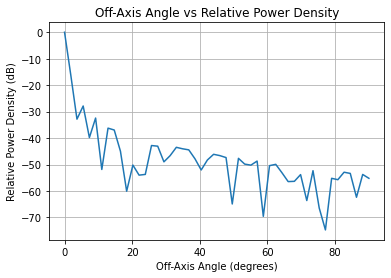

array([  0.        , -16.08483813, -32.84255696, -27.86750722,
       -39.79640331, -32.42324292, -51.84986232, -36.23656668,
       -36.94389707, -44.96119328, -60.06582702, -50.18762411,
       -53.99650342, -53.7219423 , -42.80493477, -43.05282478,
       -48.96948832, -46.62487533, -43.48016713, -44.03625889,
       -44.44186646, -47.82619243, -52.04584921, -48.26601862,
       -46.12218277, -46.6141741 , -47.35414529, -64.88847707,
       -47.6516932 , -49.81947818, -50.21892823, -48.67727712,
       -69.56324215, -50.40935326, -49.91458593, -53.08121181,
       -56.43436565, -56.33137649, -53.78498258, -63.59207129,
       -52.30801357, -66.41521998, -74.69201477, -55.19275015,
       -55.71632551, -52.88973606, -53.34288122, -62.35429961,
       -53.73261128, -55.19214715])

In [40]:
rectan(10, 0.05, 0, 100, 50, 1)

## Trying to copy exactly all the functions from the code

In [41]:
def scanrt(JA, BYH, BXH, X, Y, Z, C1, C2, C3, NA, NB, WN, A, B):
    ERSUM = 0.0
    ECSUM = 0.0
    
    # Symmetry: Only scan the first two quadrants
    for M in range(1, JA + 1):
        W = M
        YSCAN = (2.0 * W - 1.0) * BYH
        EILLY = (1.0 - 4.0 * (YSCAN / B)**2) ** NB
        Y1 = Y - YSCAN
        Y2 = Y1  # Symmetric point for Y
        
        for L in range(1, JA + 1):
            H = L
            XSCAN = (2.0 * H - 1.0) * BXH
            EILLX = (1.0 - 4.0 * (XSCAN / A)**2) ** NA
            X1 = X - XSCAN
            X2 = X + XSCAN  # Symmetric point for X
            
            # Calculate distances from the aperture to the observation points
            R1 = np.sqrt(X1**2 + Y1**2 + Z**2)
            R2 = np.sqrt(X2**2 + Y2**2 + Z**2)
            
            # Z-component of the electric field for both points
            EZR1 = (Z + R1) * C1
            EZR2 = (Z + R2) * C1
            
            # Azimuthal angles in X and Y for both points
            ARX1 = C2 * X1 / R1 if R1 != 0 else 0
            ARX2 = C2 * X2 / R2 if R2 != 0 else 0
            ARY1 = C3 * Y1 / R1 if R1 != 0 else 0
            ARY2 = C3 * Y2 / R2 if R2 != 0 else 0
            
            # Electric field components for both points
            EX1 = np.sin(ARX1) / X1 if X1 != 0 else 0
            EX2 = np.sin(ARX2) / X2 if X2 != 0 else 0
            EY1 = np.sin(ARY1) / Y1 if Y1 != 0 else 0
            EY2 = np.sin(ARY2) / Y2 if Y2 != 0 else 0
            
            # Total electric field amplitude for both points
            EA1 = EZR1 * EX1 * EY1
            EA2 = EZR2 * EX2 * EY2
            
            # Real and imaginary components
            EA1R = EA1 * np.sin(WN * R1)
            EA2R = EA2 * np.sin(WN * R2)
            EA1C = EA1 * np.cos(WN * R1)
            EA2C = EA2 * np.cos(WN * R2)
            
            # Directional adjustments
            EA1RN = EA1R * np.sqrt(1.0 - (Y1 / R1)**2) if R1 != 0 else 0
            EA2RN = EA2R * np.sqrt(1.0 - (Y2 / R2)**2) if R2 != 0 else 0
            EA1CN = EA1C * np.sqrt(1.0 - (Y1 / R1)**2) if R1 != 0 else 0
            EA2CN = EA2C * np.sqrt(1.0 - (Y2 / R2)**2) if R2 != 0 else 0
            
            # Illumination function
            EILL = EILLY * EILLX
            
            # Real and imaginary field contributions
            ER = 2.0 * (EA1RN + EA2RN) * EILL
            EC = 2.0 * (EA1CN + EA2CN) * EILL
            
            # Accumulate the results
            ERSUM += ER
            ECSUM += EC
    
    return ERSUM, ECSUM


In [42]:
def middle(RN, FDR, DFF, A, AWLR):
    if RN == 0:
        return 20  # Arbitrary fallback value
    
    AH = 0.5 * A
    R = RN * DFF
    
    if R < AH:
        NTRY = 1.0 / np.sqrt(RN * np.cos(FDR))
    else:
        RPS = R**2 + AH**2 - A * R * np.sin(FDR)
        RNP = np.sqrt(RPS) / DFF
        NTRY = 1.0 / np.sqrt(RNP)

    NTAP = 100.0 * (1.0 - np.exp(-0.023 * AWLR))
    
    if NTAP > NTRY:
        NTRY = NTAP

    if FDR < 0.0349 and NTRY > 20:
        NTRY = 20

    NTRYH = NTRY / 2
    N = 2 * (int(NTRY - NTRYH + 1))
    # Extra 2 allows for greater convergence off axis
    # N must be even

    return N


In [43]:
def pspace(AWLR, RN):
    
    # Predefined data arrays based on the Fortran logic
    AAWLR = [0.5, 10.0, 40.0, 100.0, 800.0]
    BRN = [0.001, 0.02, 0.08, 0.14, 3.0]
    AZI2 = [[70.0, 50.0, 40.0, 20.0, 10.0],
            [50.0, 40.0, 30.0, 15.0, 6.0],
            [20.0, 15.0, 10.0, 8.0, 4.0],
            [7.0, 6.0, 5.0, 4.0, 3.0],
            [6.0, 5.0, 4.0, 3.0, 1.5]]
    SPI1 = [[3.0, 3.0, 2.5, 2.0, 1.5],
            [2.7, 2.5, 2.1, 1.2, 0.5],
            [2.2, 1.8, 1.6, 0.6, 0.3],
            [1.4, 0.8, 0.6, 0.4, 0.2],
            [1.2, 0.7, 0.4, 0.2, 0.15]]

    # Find matching indices for AWLR and RN
    JJ = np.searchsorted(AAWLR, AWLR)
    JL = np.searchsorted(BRN, RN)

    # Interpolation between table values
    AZI = [0.0] * 4
    SPI = [0.0] * 4
    for i in range(4):
        AZI[i] = AZI2[JL][JJ]
        SPI[i] = SPI1[JL][JJ]

    print(AZI)
    print(SPI)
        
    return AZI, SPI

In [44]:
def fieldp(AZI, SPI, SD, FD):
    AZ = [0.0] * 1000  # Azimuth array for points
    AZ[0] = 0.00001
    AZ[1] = SD  # Starting point

    i = 2  # Index for AZ array
    for j in range(len(AZI) - 1):
        print(AZI[j+1],AZI[j])
        slope = (SPI[j + 1] - SPI[j]) / (AZI[j + 1] - AZI[j])
        intercept = SPI[j] - slope * AZI[j]
        for k in range(int(SPI[j]), int(SPI[j + 1]) + 1):
            AZ[i] = slope * AZ[i - 1] + intercept
            i += 1

    NP = i - 1  # Number of points generated
    return AZ, NP

In [45]:
def axisrt(RN, DFF, JA, BYH, BXH, IPLOT, C1, C2, C3, NA, NB, WN, A, B):
    RA = [RN, 1.0]
    PD = [0.0] * 2
    for k in range(2):
        R = RA[k] * DFF
        Z = R
        ERSUM, ECSUM = scanrt(JA, BYH, BXH, 0.00001, 0.00001, Z, C1, C2, C3, NA, NB, WN, A, B)
        PD[k] = ERSUM**2 + ECSUM**2

    PREL = [PD[i] / PD[-1] for i in range(2)]
    return RA, PREL


In [46]:
import matplotlib.pyplot as plt

def rectan(WL, RN, SD, FD, A, B, NA, NB, IPLOT):
    PI = np.pi
    WN = 2.0 * PI / WL  # Wavenumber
    C = 299792458  # Speed of light in m/s (corrected)
    
    # Normalize aperture dimensions by wavelength
    AWLR = A / WL
    SWLR = B / WL
    
    # Far-field distance
    DFF = 2.0 * (A**2 + B**2) / WL
    
    # Resolution setup using the `MIDDLE` subroutine logic
    FDR = FD * PI / 180.0
    N = middle(RN, FDR, DFF, A, AWLR)
    
    XBOX = A / N
    YBOX = B / N
    BYH = YBOX * 0.5
    BXH = XBOX * 0.5
    
    C1 = 0.5 / (PI * WN)
    C2 = WN * BXH
    C3 = WN * BYH
    JA = N // 2
    
    # Calculate azimuth and spacing using PSPACE
    AZI, SPI = pspace(AWLR, RN)
    
    # Generate azimuth points using FIELDP
    AZ, NP = fieldp(AZI, SPI, SD, FD)
    
    # Compute the electric field for each azimuth point
    E = [0.0] * NP
    R = RN * DFF  # Range
    for k in range(NP):
        AZR = PI * AZ[k] / 180.0
        ELR = PI * SD / 180.0  # Elevation angle in radians
        
        X = R * np.sin(AZR)
        Y = R * np.sin(ELR)
        ZS = R**2 - X**2 - Y**2
        Z = np.sqrt(ZS)
        
        # Call SCANRT to calculate the electric field at this point
        ERSUM, ECSUM = scanrt(JA, BYH, BXH, X, Y, Z, C1, C2, C3, NA, NB, WN, A, B)
        
        # Total electric field
        ES = ERSUM**2 + ECSUM**2
        E[k] = np.sqrt(ES)
    
    # Normalize and convert to dB
    ERELDB = [20.0 * np.log10(E[i] / E[0]) for i in range(NP)]
    
    # Plot the results if requested
    if IPLOT:
        plt.plot(AZ[:NP], ERELDB[:NP])
        plt.title("Off-Axis Angle vs Relative Power Density")
        plt.xlabel("Off-Axis Angle (degrees)")
        plt.ylabel("Relative Power Density (dB)")
        plt.grid(True)
        plt.show()

    return ERELDB


In [47]:
# just testing it as a first pass
# def rectan(WL, RN, SD, FD, A, B, NA, NB, IPLOT):
rectan(10, 0.01, 0, 0.1, 100,50, 0, 0, 1)

[40.0, 40.0, 40.0, 40.0]
[2.5, 2.5, 2.5, 2.5]
40.0 40.0


ZeroDivisionError: float division by zero

## Loading in CHIME aperture

In [74]:
CHIME_aperture = np.load('vira_aperture_cylc-small_nu-400-800.npz')
aperture = CHIME_aperture["aperture"]
x = CHIME_aperture["x"]
freqs = np.linspace(800, 400, 1024)
print(aperture.shape)
print(x.shape)

(1024, 2, 20, 720)
(1024, 720)


/Users/ana/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/Users/ana/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(0.5, 1.0, 'Find 400 MHz, y polarization')

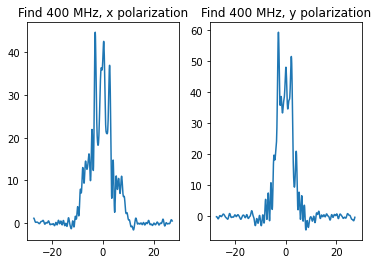

In [75]:
# trying out plotting the aperture vs x in 1 frequency--frequency index 10, feed 0 in both polarizations
find = 400
fig, ax = plt.subplots(1,2)
ax[0].plot(x[find, :], aperture[find, 0, 0, :], '-')
ax[1].plot(x[find, :], aperture[find, 1, 0, :], '-')
ax[0].set_title(f'Find {find} MHz, x polarization')
ax[1].set_title(f'Find {find} MHz, y polarization')

In [76]:
# figuring out which frequency to use
freq_diff = freqs - 717
freq_diff = np.abs(freq_diff)
closest_find = np.argmin(freq_diff)
selected_freq = freqs[closest_find]
print(closest_find)
print(selected_freq)
find = closest_find

212
717.1065493646139


/Users/ana/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/Users/ana/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(0.5, 1.0, 'Find 212 MHz, y polarization')

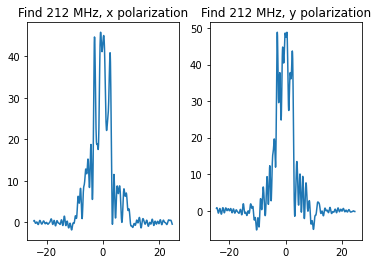

In [94]:
# plotting at 717 MHz
fig, ax = plt.subplots(1,2)
ax[0].plot(x[find, :], aperture[find, 0, 0, :], '-')
ax[1].plot(x[find, :], aperture[find, 1, 0, :], '-')
ax[0].set_title(f'Find {find} MHz, x polarization')
ax[1].set_title(f'Find {find} MHz, y polarization')

In [77]:
# The FF distance for dimension 100, frequency 400 MHz
c = 3.0e8 # in m/s
D = 100 # in m
freq = selected_freq*1e6 # in Hz
wavelength = c/freq # in m
FF_dist = 2*D**2/wavelength
print('FF distance:', FF_dist, 'm')

FF distance: 47807.10329097426 m


In [78]:
# height of NF flight
# RN = 0.02
RN = 1
NF_height = RN * FF_dist
print('NF flight height:', NF_height, 'm')

NF flight height: 47807.10329097426 m


In [79]:
print(x[find, :])

[-24.56011182 -24.4917944  -24.42347698 -24.35515956 -24.28684214
 -24.21852473 -24.15020731 -24.08188989 -24.01357247 -23.94525505
 -23.87693763 -23.80862022 -23.7403028  -23.67198538 -23.60366796
 -23.53535054 -23.46703313 -23.39871571 -23.33039829 -23.26208087
 -23.19376345 -23.12544604 -23.05712862 -22.9888112  -22.92049378
 -22.85217636 -22.78385894 -22.71554153 -22.64722411 -22.57890669
 -22.51058927 -22.44227185 -22.37395444 -22.30563702 -22.2373196
 -22.16900218 -22.10068476 -22.03236735 -21.96404993 -21.89573251
 -21.82741509 -21.75909767 -21.69078025 -21.62246284 -21.55414542
 -21.485828   -21.41751058 -21.34919316 -21.28087575 -21.21255833
 -21.14424091 -21.07592349 -21.00760607 -20.93928866 -20.87097124
 -20.80265382 -20.7343364  -20.66601898 -20.59770156 -20.52938415
 -20.46106673 -20.39274931 -20.32443189 -20.25611447 -20.18779706
 -20.11947964 -20.05116222 -19.9828448  -19.91452738 -19.84620997
 -19.77789255 -19.70957513 -19.64125771 -19.57294029 -19.50462287
 -19.436305

In [95]:
# putting together information about each linear aperture
n_apertures = len(x[find, :]) - 1

a_i_all = [x[find, i+1] - x[find, i] for i in range(0, n_apertures)]
b_i_all = np.zeros(len(x[find, :] - 1))

# calculating the centers of each aperture (alpha_i and beta_i)
alpha_i_all = [(x[find, i+1] + x[find, i])/2 for i in range(0, n_apertures)]
beta_i_all = np.zeros(n_apertures)

print(n_apertures)
print(len(alpha_i_all))
print(len(a_i_all))
print(a_i_all[:10])
print(alpha_i_all[:10])

719
719
719
[0.0683174181244155, 0.06831741812441194, 0.0683174181244155, 0.06831741812441194, 0.0683174181244155, 0.06831741812441194, 0.0683174181244155, 0.06831741812441194, 0.0683174181244155, 0.0683174181244155]
[-24.52595310666459, -24.45763568854018, -24.389318270415764, -24.32100085229135, -24.252683434166936, -24.184366016042524, -24.11604859791811, -24.047731179793693, -23.97941376166928, -23.911096343544866]


In [134]:
# Make a NF vector--just on the x axis over the existing aperture we have now
angles_on_sky = np.linspace(-10, 10, 300)
angles_radians = np.radians(angles_on_sky)
# convert angles on sky to x values
NF_x = NF_height*np.tan(angles_radians)
# NF_x_old = np.linspace(x[find, 0] - 30, x[find, -1] + 30, 300)
NF_y = np.zeros(300)
NF_z = NF_height * np.ones(300)

In [135]:
# this is for 1 feed
# making the "illumination function" from the aperture--the average of values on the edges
feed_ind = 0
# x polarization
ill_x = [(aperture[find, 0, feed_ind, i+1] + aperture[find, 0, feed_ind, i])/2 for i in range(0, len(x[find, :]) - 1)]
# y polarization
ill_y = [(aperture[find, 1, feed_ind, i+1] + aperture[find, 1, feed_ind, i])/2 for i in range(0, len(x[find, :]) - 1)]

In [136]:
len(ill_x)

719

In [137]:
# this is for all the feeds
# making the "illumination function" from the aperture--the average of values on the edges
feed_ind = 0
# x polarization
ill_x_all = np.array([(aperture[find, 0, :, i+1] + aperture[find, 0, feed_ind, i])/2 for i in range(0, len(x[find, :]) - 1)])
# y polarization
ill_y_all = np.array([(aperture[find, 1, :, i+1] + aperture[find, 1, feed_ind, i])/2 for i in range(0, len(x[find, :]) - 1)])

In [138]:
print(len(ill_x_all))
print(len(ill_y_all))
print(len(ill_x_all[0]))
print(ill_x_all.shape)

719
719
20
(719, 20)


Text(0.5, 1.0, 'Find 212 MHz, y polarization')

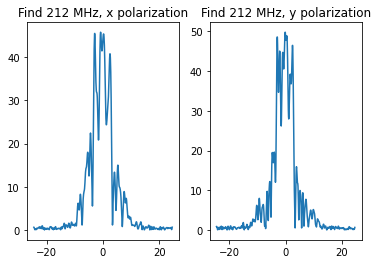

In [139]:
# trying out plotting the aperture illumination vs x in 1 frequency--frequency index 10, feed 0 in both polarizations
fig, ax = plt.subplots(1,2)
ax[0].plot(alpha_i_all, np.abs(ill_x_all[:,0]), '-')
ax[1].plot(alpha_i_all, np.abs(ill_y_all[:,0]), '-')
ax[0].set_title(f'Find {find} MHz, x polarization')
ax[1].set_title(f'Find {find} MHz, y polarization')

In [140]:
def scanrt_full_aperture(a_i_all, b_i_all, alpha_i_all, beta_i_all, X, Y, Z, freq, illum):
    """
    SCANRT subroutine adjusted to scan the entire aperture without symmetry.
    
    for a single x, y, z but for a list of a_i, b_i, alpha_i, beta_i
    
    Returns:
    - ERSUM: Real part of the electric field
    - ECSUM: Imaginary part of the electric field
    """
    
    # Initialize sums for real and imaginary components
    ERSUM = 0.0
    ECSUM = 0.0
    E_complex = 0.0
    
    c = 3.0e8 # in m/s
    wavelength = c/freq # in m
    k = 2*np.pi/wavelength # in m^(-1)

    # Full aperture scan (negative to positive X and Y)--scan through all subapertures
    for i_adim in range(len(a_i_all)): 
        ill = illum[i_adim]
        a_i = a_i_all[i_adim]
        b_i = b_i_all[i_adim]
        alpha_i = alpha_i_all[i_adim]
        beta_i = beta_i_all[i_adim]

        Y1 = Y - beta_i
        X1 = X - alpha_i
#         print(X1)
#         print(Y1)

        # Distance calculations for each point
        r_iS = X1**2 + Y1**2 + Z**2
        r_i = np.sqrt(r_iS)


        # calculate C1, C2, C3
        C1 = 0.5 / (np.pi*k)
        C2 = k * a_i / 2
        C3 = k * b_i / 2

        # Z-component of the field
        EZR1 = (Z + r_i) * C1
#         print(r_i)

        # Phase angles for X and Y
        ARX1 = C2 * X1 / r_i
        ARY1 = C3 * Y1 / r_i
#         print(ARX1)
        
        # X and Y field components
        EX1 = np.sin(ARX1) / X1
#         EY1 = np.sin(ARY1) / Y1

        # Total electric field amplitude for the point
#         EA1 = EZR1 * EX1 * EY1
        EA1 = EZR1 * EX1
#         print(EA1)

        # reintroducing the exponential fabrication
        exponent = np.exp(-1j*k*r_i)
        EA1N = EA1*exponent
        
#         print(EA1N)
        
        E_complex_component = EA1N * ill
#         print(ill)

        # Real and imaginary components (with phase shifts)
#         EA1R = EA1 * np.sin(k * r_i)
#         EA1C = EA1 * np.cos(k * r_i)
#         print(EA1R)
#         print(EA1C)

        # Adjust for directional dependence
#         EA1RN = EA1R * np.sqrt(1.0 - (Y1 / r_i)**2)
#         EA1CN = EA1C * np.sqrt(1.0 - (Y1 / r_i)**2)

        # Real and imaginary field contributions for the current point
#         ER = 2.0 * EA1RN * ill
#         EC = 2.0 * EA1CN * ill
#         print(ER)
#         print(EC)

        # Sum the contributions to the total field
#         ERSUM += ER
#         ECSUM += EC

        E_complex = E_complex + E_complex_component

    return E_complex

# Example usage:
# ja = 10
# byh = 0.5
# bxh = 0.5
# X, Y, Z = 1.0, 1.0, 1.0
# C1, C2, C3 = 1.0, 1.0, 1.0
# NA, NB = 2, 2
# WN = 2 * np.pi / 1.0  # Assuming wavelength is 1 unit
# A, B = 2.0, 2.0
# ERSUM, ECSUM = scanrt_full_aperture(ja, byh, bxh, X, Y, Z, C1, C2, C3, NA, NB, WN, A, B)
# print(f"Real part of the field: {ERSUM}, Imaginary part: {ECSUM}")

In [141]:
print(len(a_i_all))
print(len(b_i_all))
print(len(alpha_i_all))
print(len(beta_i_all))
print(len(NF_x))
print(len(NF_y))
print(len(NF_z))

719
720
719
719
300
300
300


In [142]:
print(b_i_all)
print()

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

In [143]:
# loop through E-field calculations for each feed

# E field is stored as [x value, feed]
complex_E_field_x = np.empty((len(NF_x), 20), dtype = complex)
complex_E_field_y = np.empty((len(NF_x), 20), dtype = complex)
    
for i_feed in range(20):
    
    ill_x = ill_x_all[:,i_feed]
    ill_y = ill_y_all[:,i_feed]

    # calculate E-field for all the points on the NF grid using SCANRT copy (from Fortran)
#     real_E_field = np.empty(len(NF_x), dtype = float)
#     imag_E_field = np.empty(len(NF_x), dtype = float)

    for ix_value in range(len(NF_x)):        

        complex_E_field_x[ix_value, i_feed] = scanrt_full_aperture(a_i_all, b_i_all, alpha_i_all, beta_i_all, 
            NF_x[ix_value], NF_y[ix_value], NF_z[ix_value], freq, ill_x)
        complex_E_field_y[ix_value, i_feed] = scanrt_full_aperture(a_i_all, b_i_all, alpha_i_all, beta_i_all, 
            NF_x[ix_value], NF_y[ix_value], NF_z[ix_value], freq, ill_y)

    #         if w:
    #             # Iterate over captured warnings
    #             for warning in w:
    #                 print(f"Iteration x: {ix_value}, y: {iy_value} caused a warning: {warning.message}")


In [144]:
outputs = scanrt_full_aperture(a_i_all, b_i_all, alpha_i_all, beta_i_all, 
        NF_x[0], NF_y[0], NF_z[0], freq, ill_x)

In [90]:
print(outputs)

(2.9537909775822246-6.590313618231364j)


In [91]:
print(ill_x)

[(0.39027225971221924-0.5759432315826416j), (0.4418092966079712-0.48606953024864197j), (0.42117875814437866-0.3557177484035492j), (0.3381722867488861-0.19866947829723358j), (0.21247701346874237-0.034521881490945816j), (0.06965917348861694+0.11414091289043427j), (-0.06374214589595795+0.22546523809432983j), (-0.16511395573616028+0.282299280166626j), (-0.21975001692771912+0.2755964398384094j), (-0.2231953740119934+0.2065177708864212j), (-0.1815834641456604+0.08672495186328888j), (-0.10995962470769882-0.06333920359611511j), (-0.028988642618060112-0.21791750192642212j), (0.03930816799402237-0.3506210446357727j), (0.07596469670534134-0.43947166204452515j), (0.06876102834939957-0.47124603390693665j), (0.01455725822597742-0.44427233934402466j), (-0.08014725148677826-0.3690245747566223j), (-0.20046135783195496-0.26629161834716797j), (-0.32588475942611694-0.16315634548664093j), (-0.43408215045928955-0.08748690783977509j), (-0.5048877596855164-0.06201576441526413j), (-0.5238301753997803-0.0991675

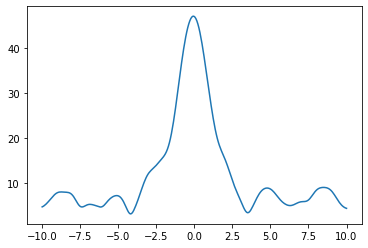

In [145]:
plt.plot(angles_on_sky, np.abs(complex_E_field_x[:,0]))

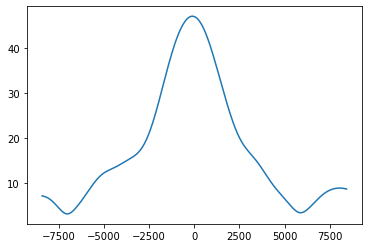

In [146]:
plt.plot(NF_x, np.abs(complex_E_field))

In [147]:
# taking the median across all the feeds
complex_NF_x_median = np.median(complex_E_field_x, axis=1)
complex_NF_y_median = np.median(complex_E_field_y, axis=1)
# get the absolute value
NF_x_amp = np.abs(complex_NF_x_median)
NF_y_amp = np.abs(complex_NF_y_median)
# find where the angle is basically 0
abs_angle = np.abs(angles_on_sky)
transit_index = np.argmin(abs_angle)
print(transit_index)
print(angles_on_sky[transit_index])
# normalizing
NF_x_normalized = NF_x_amp/NF_x_amp[transit_index]
NF_y_normalized = NF_y_amp/NF_y_amp[transit_index]

149
-0.03344481605351213


In [127]:
print(complex_NF_x_median)

[ 2.86519947e+00-6.54883859e+00j -3.04207165e+00-5.35668138e+00j
 -5.99301628e+00+1.05391413e+00j  1.12747654e+00+5.85186705e+00j
  5.73666050e+00-1.76802822e+00j -3.66468752e+00-5.01790277e+00j
 -2.82473582e-01+4.34432320e+00j  3.85861610e+00-4.49891778e+00j
 -4.89538225e+00+3.66668502e+00j  5.15872331e+00-1.06240302e+00j
 -4.69232846e+00+3.40289651e+00j  3.39073314e+00-3.95449639e+00j
 -4.79687387e-01+5.12305757e+00j -2.52099615e+00-4.21464229e+00j
  4.28529836e+00-1.50885116e+00j  4.47689344e-01+4.93844973e+00j
 -3.92032757e+00+9.33492941e-01j -1.42382557e+00-2.77388670e+00j
  1.83656023e+00-3.32190023e+00j  3.33344959e+00-1.50533711e+00j
  2.63429621e+00+1.22180171e+00j  1.93759773e+00+1.38456872e+00j
  1.77257092e+00+1.22054436e+00j  1.98589871e+00+2.41648954e+00j
  2.19789421e+00-1.74521260e+00j  8.29726725e-01-2.44241062e+00j
 -1.55613349e+00-1.86436122e+00j -1.68958213e+00+4.31936711e-01j
  8.75369876e-01+2.49200184e+00j  1.47204279e+00-9.08679856e-01j
 -2.13890994e+00-1.055788

Text(0.5, 1.0, 'Y polarization NF median')

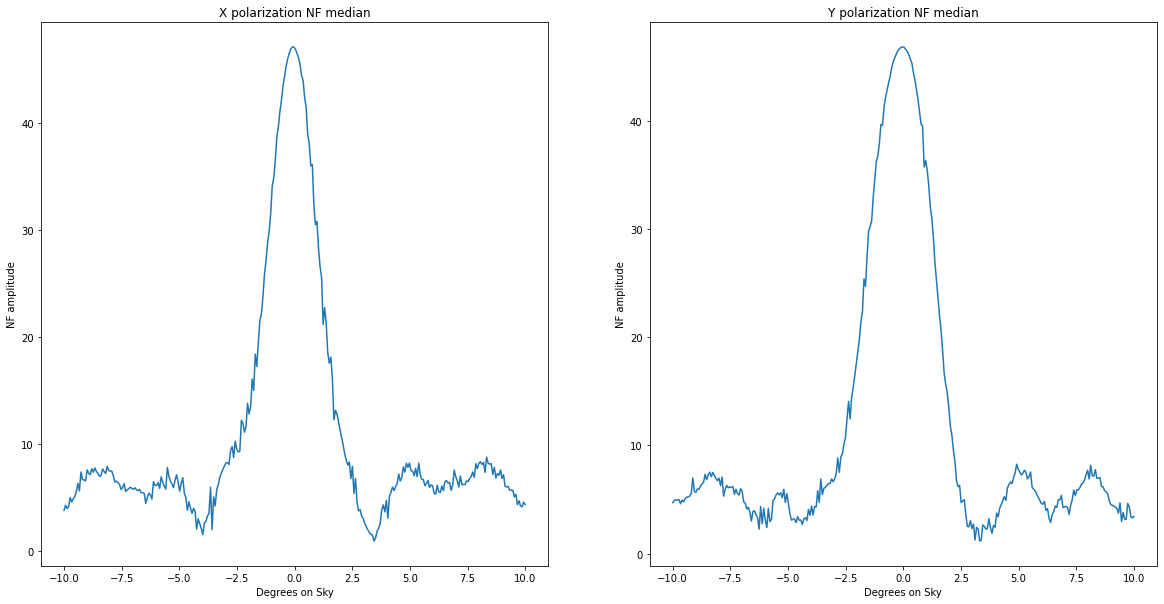

In [148]:
# plot the median
fig, ax = plt.subplots(1, 2, figsize = (20, 10))
ax[0].plot(angles_on_sky, np.abs(complex_NF_x_median))
ax[0].set_xlabel('Degrees on Sky')
ax[0].set_ylabel('NF amplitude')
ax[0].set_title('X polarization NF median')
ax[1].plot(angles_on_sky, np.abs(complex_NF_y_median))
ax[1].set_xlabel('Degrees on Sky')
ax[1].set_ylabel('NF amplitude')
ax[1].set_title('Y polarization NF median')

Text(0.5, 1.0, 'Normalized Y polarization NF median')

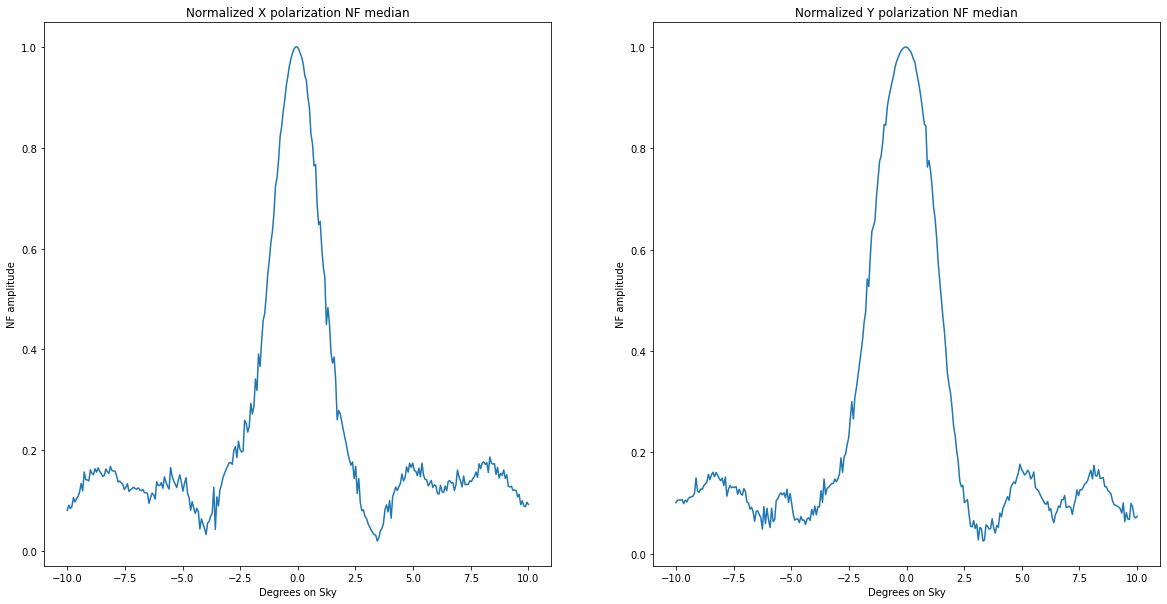

In [149]:
# plot the normalized median
fig, ax = plt.subplots(1, 2, figsize = (20, 10))
ax[0].plot(angles_on_sky, NF_x_normalized)
ax[0].set_xlabel('Degrees on Sky')
ax[0].set_ylabel('NF amplitude')
ax[0].set_title('Normalized X polarization NF median')
ax[1].plot(angles_on_sky, NF_y_normalized)
ax[1].set_xlabel('Degrees on Sky')
ax[1].set_ylabel('NF amplitude')
ax[1].set_title('Normalized Y polarization NF median')

NF flight height: 47807.10329097426 m
149
-0.03344481605351213
NF flight height: 23903.55164548713 m
149
-0.03344481605351213
NF flight height: 11951.775822743564 m
149
-0.03344481605351213
NF flight height: 4780.7103290974255 m
149
-0.03344481605351213
NF flight height: 2390.3551645487128 m
149
-0.03344481605351213


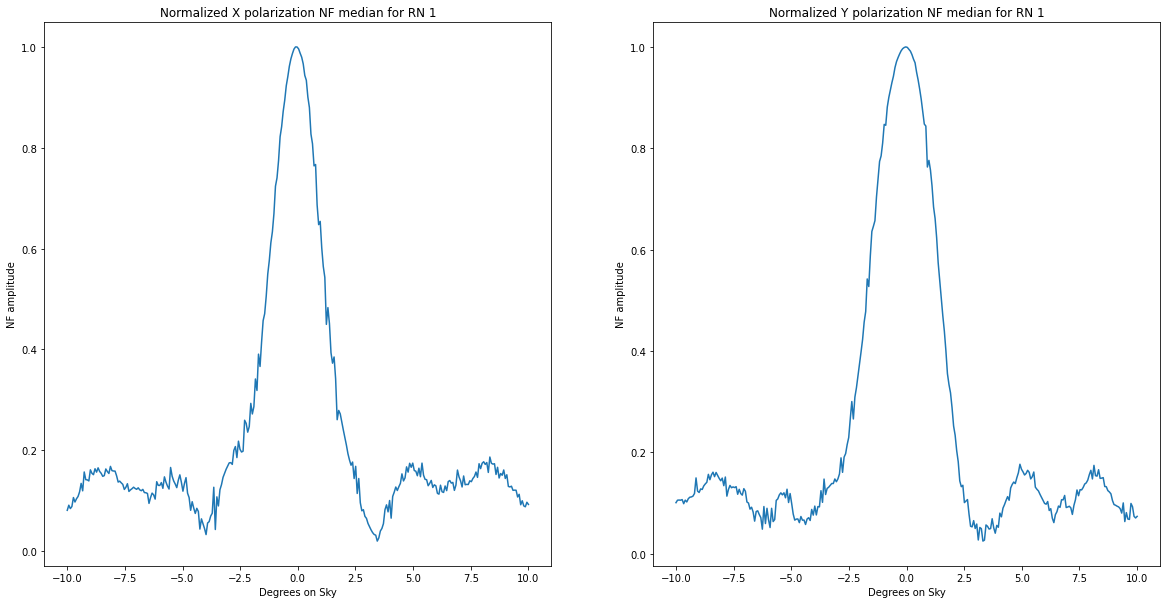

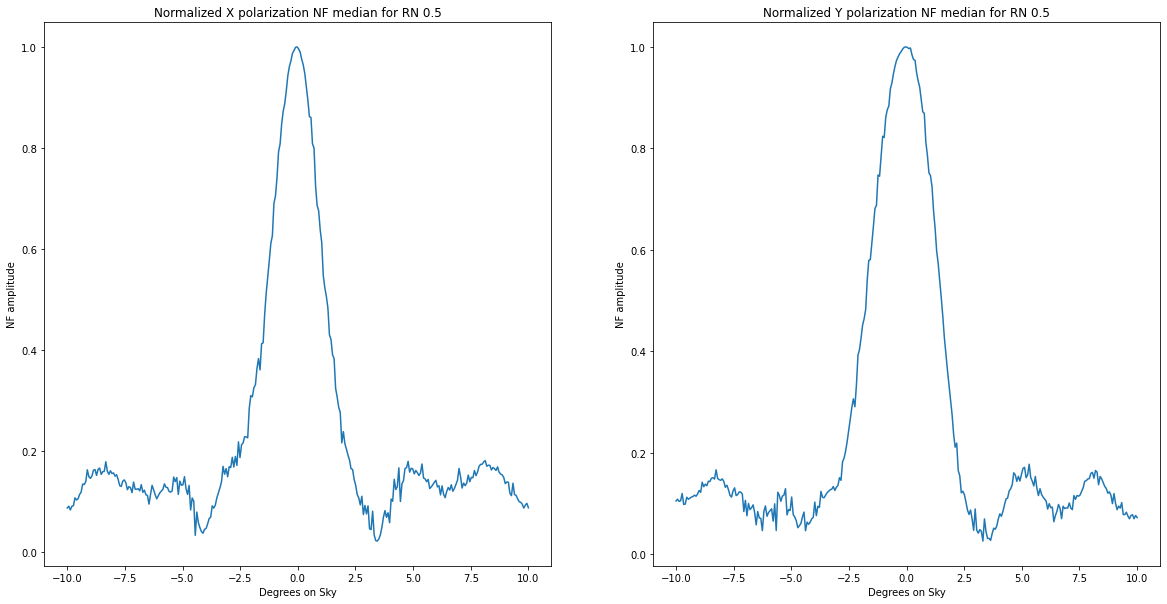

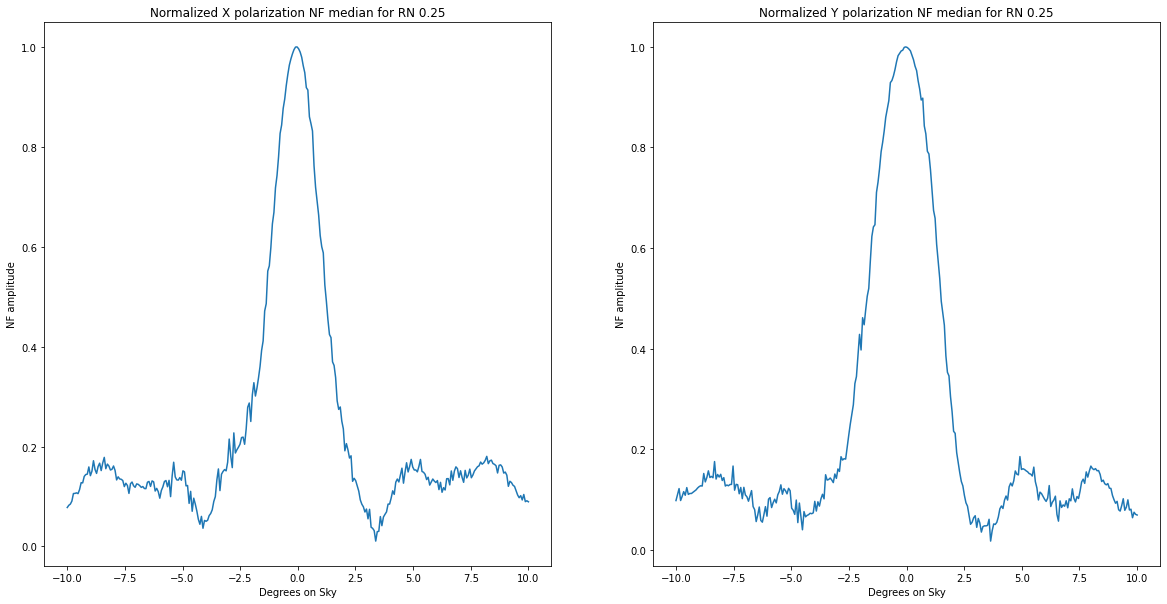

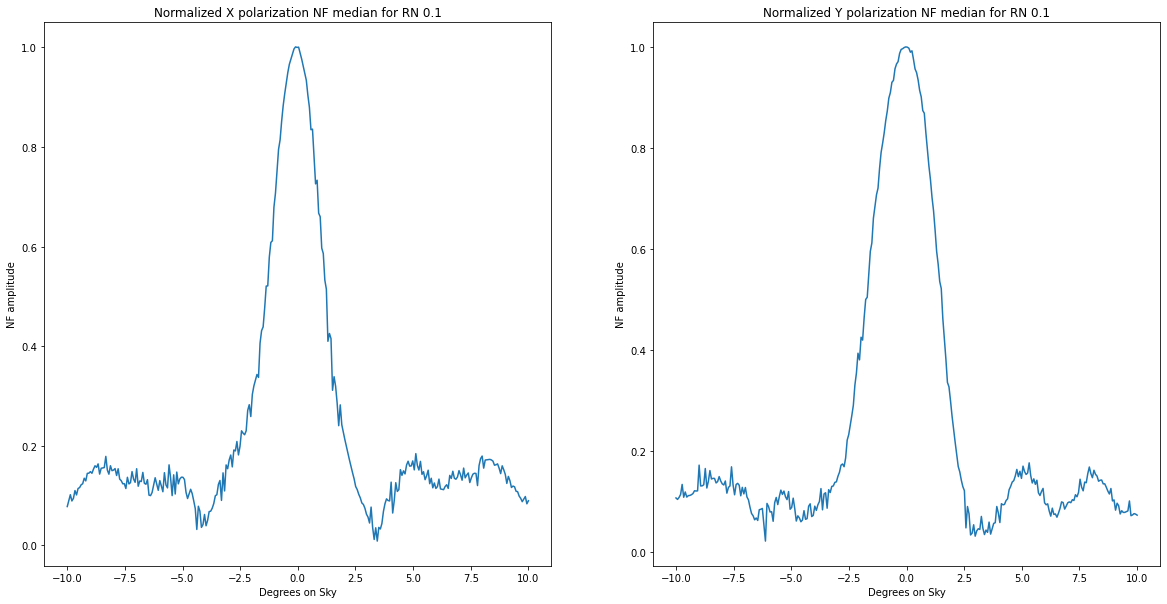

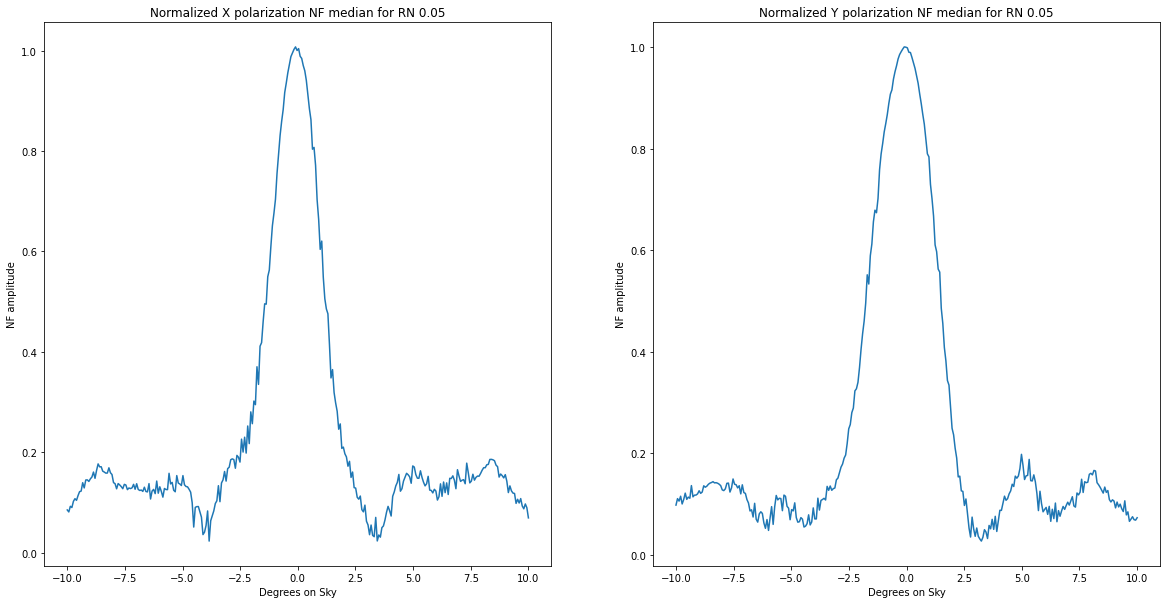

In [150]:
# trying with some different distances

RN_list = [1, 0.5, 0.25, 0.1, 0.05]

for i_RN in range(len(RN_list)):

    RN = RN_list[i_RN]
    NF_height = RN * FF_dist
    print('NF flight height:', NF_height, 'm')

    # Make a NF vector--just on the x axis over the existing aperture we have now
    angles_on_sky = np.linspace(-10, 10, 300)
    angles_radians = np.radians(angles_on_sky)
    # convert angles on sky to x values
    NF_x = NF_height*np.tan(angles_radians)
    # NF_x_old = np.linspace(x[find, 0] - 30, x[find, -1] + 30, 300)
    NF_y = np.zeros(300)
    NF_z = NF_height * np.ones(300)
    
    # loop through E-field calculations for each feed
    # E field is stored as [x value, feed]
    complex_E_field_x = np.empty((len(NF_x), 20), dtype = complex)
    complex_E_field_y = np.empty((len(NF_x), 20), dtype = complex)

    for i_feed in range(20):

        ill_x = ill_x_all[:,i_feed]
        ill_y = ill_y_all[:,i_feed]

        # calculate E-field for all the points on the NF grid using SCANRT copy (from Fortran)
    #     real_E_field = np.empty(len(NF_x), dtype = float)
    #     imag_E_field = np.empty(len(NF_x), dtype = float)

        for ix_value in range(len(NF_x)):        

            complex_E_field_x[ix_value, i_feed] = scanrt_full_aperture(a_i_all, b_i_all, alpha_i_all, beta_i_all, 
                NF_x[ix_value], NF_y[ix_value], NF_z[ix_value], freq, ill_x)
            complex_E_field_y[ix_value, i_feed] = scanrt_full_aperture(a_i_all, b_i_all, alpha_i_all, beta_i_all, 
                NF_x[ix_value], NF_y[ix_value], NF_z[ix_value], freq, ill_y)

        #         if w:
        #             # Iterate over captured warnings
        #             for warning in w:
        #                 print(f"Iteration x: {ix_value}, y: {iy_value} caused a warning: {warning.message}")

    # taking the median across all the feeds
    complex_NF_x_median = np.median(complex_E_field_x, axis=1)
    complex_NF_y_median = np.median(complex_E_field_y, axis=1)
    # get the absolute value
    NF_x_amp = np.abs(complex_NF_x_median)
    NF_y_amp = np.abs(complex_NF_y_median)
    # find where the angle is basically 0
    abs_angle = np.abs(angles_on_sky)
    transit_index = np.argmin(abs_angle)
    # normalizing
    NF_x_normalized = NF_x_amp/NF_x_amp[transit_index]
    NF_y_normalized = NF_y_amp/NF_y_amp[transit_index]
    
    # plot the normalized median
    fig, ax = plt.subplots(1, 2, figsize = (20, 10))
    ax[0].plot(angles_on_sky, NF_x_normalized)
    ax[0].set_xlabel('Degrees on Sky')
    ax[0].set_ylabel('NF amplitude')
    ax[0].set_title(f'Normalized X polarization NF median for RN {RN}')
    ax[1].plot(angles_on_sky, NF_y_normalized)
    ax[1].set_xlabel('Degrees on Sky')
    ax[1].set_ylabel('NF amplitude')
    ax[1].set_title(f'Normalized Y polarization NF median for RN {RN}')

In [73]:
## CHECKING THE ILLUMINATION FUNCTION WORKS
# calculate E-field for all the points on the NF grid using SCANRT copy (from Fortran)
real_E_field = np.empty(len(NF_x), dtype = float)
imag_E_field = np.empty(len(NF_x), dtype = float)
complex_E_field = np.empty(len(NF_x), dtype = complex)

ill = np.ones(len(ill_x))

for ix_value in range(len(NF_x)):        

    complex_E_field[ix_value] = scanrt_full_aperture(a_i_all, b_i_all, alpha_i, beta_i, 
        NF_x[ix_value], NF_y[ix_value], NF_z[ix_value], freq, ill)
    
    

NameError: name 'alpha_i' is not defined

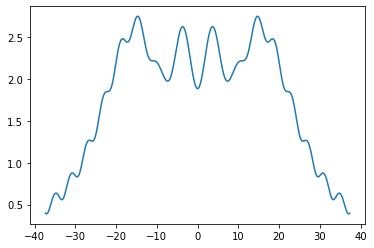

In [181]:
plt.plot(NF_x, np.abs(complex_E_field))